In [24]:
import pandas as pd
import numpy as np

from scipy.stats import norm

In [2]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/winequality-red.csv'

https://archive.ics.uci.edu/ml/datasets/Wine

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [3]:
wine = pd.read_csv(url, sep=';')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.shape

(1599, 12)

# What's the chance of the sample to reflects the reality?

The **confidence level** ($1 - \alpha$) represents the probability of correctness of the estimate. In addition, the **level of significance** ($\alpha$) express the probability of error in the estimate.

The **confidence level** represents the degree of reliability of the estimate result being within a certain range. When we set a **95% confidence level** in a survey, for example, we are assuming that there is a 95% probability that the survey results represent reality well, that is, they are correct.

The **confidence level** of an estimate can be obtained from the area under the normal curve as shown in the figure below.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

## Inferential error

The **inferential error** is defined by the **standard deviation of the sample means** $\sigma_\bar{x}$ and by the **level of confidence** determined for the process.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

Suppose the density of the wine is distributed approximately as normal. Calculate the standard deviation and the mean of a sample of 1000 elements. Build a confidence interval for the population average assuming a significance level of 5%.

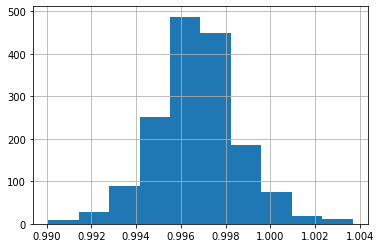

In [13]:
wine['density'].hist();

In [6]:
wine['density'].head()

0    0.9978
1    0.9968
2    0.9970
3    0.9980
4    0.9978
Name: density, dtype: float64

In [7]:
wine_sample = wine.sample(n=1000, random_state=202)

In [9]:
wine_sample.shape

(1000, 12)

In [11]:
std_wine_sample = wine_sample['density'].std()
std_wine_sample

0.001842888958894381

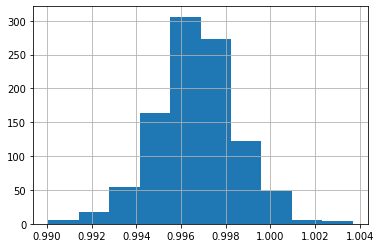

In [15]:
wine_sample['density'].hist();

- It seems a normal distribution

In [21]:
significance = 0.05
confidence_level_pct = 1 - significance

n = 1000

### Obtaning Z - Standardized normal table

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

### Z value for the most used confidence level 

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|

Getting the **std of the sample means** $\sigma_\bar{x}$

In [18]:
sigma = std_wine_sample/np.sqrt(n)
sigma

5.827726584882664e-05

Getting the inferential error $e$

In [19]:
# level confidence = 95%
z = 1.96

In [20]:
error = z*sigma
error

0.00011422344106370022

The error is in the same scale of the wine density. 

### Getting the confidence level

In [22]:
sample_mean = wine_sample['density'].mean()

confidence_interval = [sample_mean - error, 
                       sample_mean + error]

In [23]:
confidence_interval

[0.9965902065589363, 0.9968186534410637]

The wine density can be between 0.9965902065589363 to 0.9968186534410637.

Another way to calculate the confidence interval -- using scipy

In [26]:
norm.interval(alpha=0.95, 
              loc=sample_mean, 
              scale=sigma)

(0.9965902086578188, 0.9968186513421812)